# Multi-panel figures

We will often want to put multiple panels in a figure. In fact, take a look at the current issue of [Nature](https://www.nature.com/nature/articles?type=letter) (generally regarded as the top scientific journal in the world), and you will see *all* of the figures shown in the article listing have multiple panels. The reason is quite simply that, in general, there are multiple aspects of a single data set, experiment, etc., that tell a single story together. It is thus more effective to have these multiple aspects conveyed in a single figure so that the reader can appreciate these aspects and their interrelationships together.

In this tutorial, we will go through the most basic of making multi-panel figures using `matplotlib`, and we'll go to through next two in the next tutorial. The three methods offer a trade-off between ease and simplicity on the one hand power and flexibility on the other. Which you use for projects in the future will depend largely on your own preference and the task and hand.

As always, we need to import the needed libraries to get going.

In [1]:
# first things first
import numpy as np
import matplotlib.pyplot as plt

Next, we're going to make some data to play with. Don't worry about the code just yet – we can just think about as a black box data generator for now. You can come back and see if you can make sense of it once we've played with the data a little bit.

In [2]:
### make some data to play with
my_means = [0, 0]
my_cov = [[2, -1.9], [-1.9, 3]]
my_n = 5000

my_rng = np.random.default_rng()
x, y = my_rng.multivariate_normal(my_means, my_cov, my_n).T
y = y**2

After running the above, we should have two vectors of data, `x` and `y`, each of which contain 5000 data points.

In the code cell below, confirm the shapes of `x` and `y`.

In [9]:
# how big are our variables?

x.shape
y.shape

(5000,)

## looking at data with individual figures

First, let's examine the data with the "quickie" single plot tools we already have. In the two code cells below, make histograms of x and y.

To save time and code clutter, we'll break our "always annotate plots" rule and only annotate when it illustrates something about multi-plot figures. 

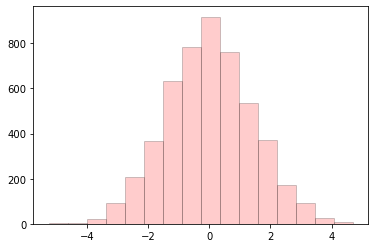

In [10]:
# histogram of x

plt.hist(x, bins = 16, color = 'r', edgecolor = 'k', alpha = 0.2);

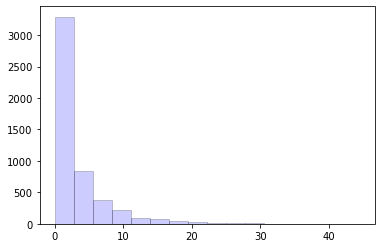

In [12]:
# histogram of y

plt.hist(y, bins = 16, color = 'b', edgecolor = 'k', alpha = 0.2);

Clearly, these two sets of data have distributions of very different shape. Still, it might be easier to compare them if we put them on the same plot. Use the code cell below to plot them together. Set the `alpha` for both to something below 0.5 so you can see the overlapping regions.

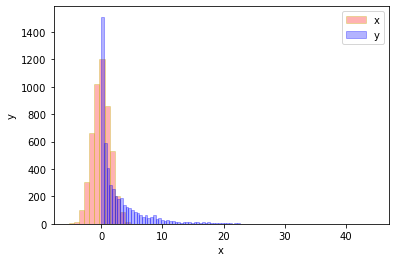

In [18]:
# both histograms on the same plot.


plt.hist(x, bins = 12, color = 'r', edgecolor = 'y', alpha = 0.3, label = 'x');
plt.hist(y, bins = 100, color = 'b', edgecolor = 'b', alpha = 0.3, label = 'y');


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Before we move on, let's consider this plot some more. Both x and y have 5000 points, so why is the distribution of y so much higher? Play around with the binwidth of one or both histograms until you have a plot that you think conveys both the relative heights and shapes of the two distributions fairly well.

Now let's plot the relationship between x and y using `plt.scatter()`! There are going to be a ***lot*** of data points that occlude other data points in the default plot. So, after making the initial plot, play around with the `alpha` and size (`s = `) parameters until you get a plot you are happy with.

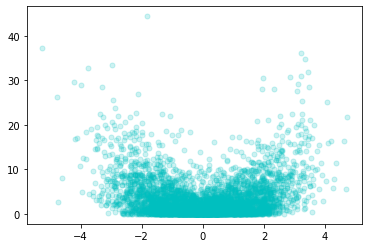

In [41]:
# scatter plot of x,y

plt.scatter(x, y, s = 25, alpha = 0.2, color = "c")

Here, we can see that there *is* a relationship between x and y. Large positive values of y seem to occur at large absolute values of x, giving the data a bowl or parabolic shape overall. Moreover, while most x values seem to cluster between -2 and +2, the y values seem to tend towards small positive values and cut off rather sharply at 0.

It would be nice if we could show all the plots above on the same figure, so we could appreciate the both the distributions of x and y (without regard to the other) and the x,y relationship at once.

## a multi-panel figure with `subplot()`

The first tool we can use to make a multi-panel figure is `subplot()`. In it's basic use, `plt.subplot(nrows, ncols, index)` creates an `nrows`-by-`ncols` matrix of subplot locations in the current figure, and makes an `axes` at the location specified by `index`. The locations are numbered left-to-right, top-to-bottom. If a figure doesn't exist, a new one is created.

Let's run this:

<AxesSubplot:>

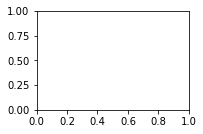

In [42]:
plt.subplot(2,2,1)

That made a new figure with 2x2 grid of potential plot locations, created an `axes` at location 1 (top left) and made it "live", meaning that any plotting would go in that `axes`. 

Because there are no other `axes` objects in the figure, Jupyter isn't showing us the whole figure.

Note: Throughout, when we mean "axes" or "axis" in the generic sense, the words will be in plain text. When we mean them in the `matplotlib` sense, they will be typeset as code: `axes`, `axis`.

Let's try this:

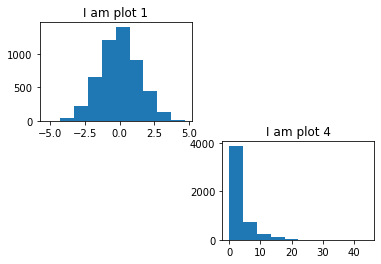

In [43]:
plt.subplot(2,2,1)       # makes a figure with a 2x2 grid of potential locations, 
                         # makes an axex at location 1, and sets it to "live"

plt.title('I am plot 1')
plt.hist(x);

plt.subplot(2,2,4)      # makes an axes at location 4 and sets it to "live"
plt.title('I am plot 4')
plt.hist(y);

You can jump around the plots if you wish:

Text(0.0, 1000, 'Back to plot 1!')

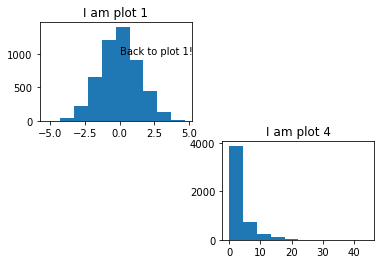

In [46]:
plt.subplot(2,2,1)
plt.title('I am plot 1')
plt.hist(x);

plt.subplot(2,2,4)
plt.title('I am plot 4')
plt.hist(y);

plt.subplot(2,2,1)
plt.text(0.0, 1000, 'Back to plot 1!')


Personally, we think it's more clear to make one plot live, do everything your going to do to that plot, and then move on to the next plot. However, some people might prefer to, say, go through the figures once to do all the plotting, and then cycle through them again to do the annotating, etc. You do you.

### first try

Let's put all three of our graphs in one figure:

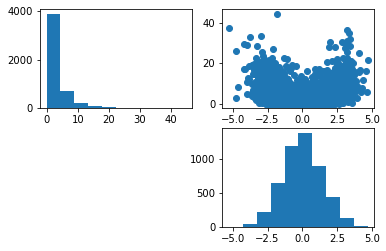

In [47]:
plt.subplot(2,2,1)
plt.hist(y);

plt.subplot(2,2,4)
plt.hist(x);

plt.subplot(2,2,2)
plt.scatter(x,y);

Not bad. The visual comparison of the x distribution with the scatter plot is nice, because the horizontal axis of each plot lines up with the other. That's not true for out y values however. Let's fix that.

### adjust orientation of a subplot

The big problem we have with our figure is that our y variable values run up and down in the scatter plot (which is how we want them), but left and right on our histogram. 

In the code cell below, recycle the code from above, but try setting an `orientation` argument to `'horizontal'` in the call to make the y histogram.

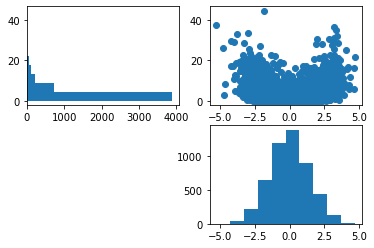

In [48]:
# put the y histogram on its side


plt.subplot(2,2,1)
plt.hist(y, orientation = 'horizontal');

plt.subplot(2,2,4)
plt.hist(x);

plt.subplot(2,2,2)
plt.scatter(x,y);

### turning ticks off

A good general rule for graphics is that the cleaner, the better. Notice that in the above plots, the x axis is shared by the right two plots, and the y axis is shared by the top two plots. So we can remove some redundancy and visual clutter by turning some ticks off.

There is a `yticks()` and an `xticks()` method in `matplotlib.pyplot` (which we have imported as `plt`) that allows us to specify tick marks. If we give it an empty list, there will be no ticks!

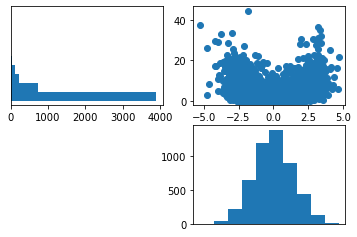

In [53]:
plt.subplot(2,2,1)
plt.hist(y, orientation = 'horizontal');  # make the histogram bars horizontal
plt.yticks([]) # eliminate the y ticks

plt.subplot(2,2,4)
plt.hist(x);
plt.xticks([]) # goodbye x ticks

plt.subplot(2,2,2)
plt.scatter(x,y);

After running the code above, modify it to remove the x ticks from the histogram of x values and re-run it.

### inverting an axis

Visually, it is nice to have the corresponding axes next to one another on the figure. In the plot above, we can do this for the y value histogram by flipping the axis of counts so that zero is to the right and higher counts go to the left.

While `plt` can do certain things to the current `axes` (like plot in it), or even to an `axis` in its `axes` (like turn off the ticks), some things need to be done by the `axes` itself, like inverting an `axis`.

So, in order to flip some `axis`, we are going to assign our own names to the `axes` objects, and then call on them to accomplish our goal.

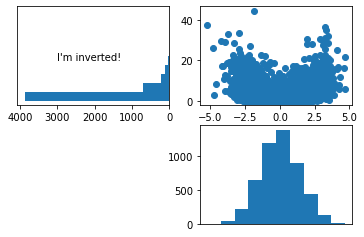

In [54]:
yhist_ax = plt.subplot(2,2,1)             # name our y histogram axes object 'yhist_ax'
plt.hist(y, orientation = 'horizontal');
plt.yticks([])
yhist_ax.invert_xaxis()                   # have the axes invert its x axis
plt.text(3000, 20, 'I\'m inverted!')

plt.subplot(2,2,4)
plt.hist(x);
plt.xticks([])

plt.subplot(2,2,2)
plt.scatter(x,y);

Modify the above code to flip the y axis of our x values histogram too!

Remember that `matplotlib` is a hierarchy of `artists`. Though not strictly an `artist`, `plt` sits at the top. 

    * `plt` - the creator and evil overlord that can do many things, but not all things
    * `figure` - contains the `axes` objects
    * `axes` - contains the plots and `axis` objects
    * `axis` - has ticks, upper and lower limits, etc.
    
So if you want to do something 

    1. see if maybe `plt` can do it
    2. look for methods at the right level. 
    
For example, if you wanted to change the background of the whole figure, you would look at the figure level, whereas if you wanted to change the background color of a specific plot, you would look at the `axes` level.

For reference, [here](https://matplotlib.org/stable/api/pyplot_summary.html) is a list of `plt` methods.   

Let's change the background color of our figure to make the `axes` stand out more. To do this, instead of letting the first call to `plt.subplot()` make the figure for us, we'll make it ourselves and give it a name so we can call its methods.

If `plt.subplot()` makes a subplot and `plt.text()` makes some text, what do you think makes a figure?

Text(0, 0.5, 'george')

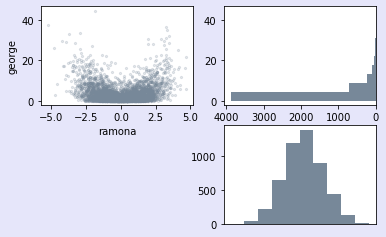

In [88]:
fig = plt.figure()                        # make the figure and name it fig
fig.set_facecolor('lavender')                 # set the face color to gray

# y subplot
yhist_ax = plt.subplot(2,2,2)             # name our y histogram axes object
plt.hist(y, orientation = 'horizontal', color = 'lightslategrey');
yhist_ax.invert_xaxis()                   # have the axes invert its x axis

# x subplot()
plt.subplot(2,2,4)
plt.hist(x, color = 'lightslategrey');
plt.xticks([])

# scatterplot subplot
plt.subplot(2,2,1) # scatterplot in upper left
plt.scatter(x,y, s = 5, alpha = 0.2, color = "lightslategrey");
plt.xlabel('ramona') # name x axis
plt.ylabel('george') # name y axis


You can use common color names to set the color of the background, but you can also use three numbers to set the rgb (red, green, and blue) values, and an optional fourth number to set the alpha (transparency). Try it in the code above!

Also, you can set the size of your figure when you make the figure. You might need to do this to make room for axis labels or titles.

### making the figure your own.

Now it's time to have some fun. Starting with the above code, make this figure your own. The only requirements are:

* put the scatter plot in the upper left, where it is most prominent
* have the x and y value axes of the histograms closest to the scatter plot
* put x and y axes labels on the scatter plot
* tweak the scatter plot color, marker size, and/or alpha to get a nice plot
* make the histogram colors match the scatter plot